Модуль №2
з дісципліни "Системи та технології штучного інтелекта"
Рогачової Вікторії

Варіант №18

Виконуємо імпорт  необхідних бібліотек.

In [42]:
import datetime as dt
import dateutil as du


import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
%matplotlib inline

Зчитуємо дані у датафрейм.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ta_feng_all_months_merged.csv', parse_dates=['TRANSACTION_DT'])
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,2000-11-01,1104905,45-49,115,110411,4710199010372,2,24,30
1,2000-11-01,418683,45-49,115,120107,4710857472535,1,48,46
2,2000-11-01,1057331,35-39,115,100407,4710043654103,2,142,166
3,2000-11-01,1849332,45-49,Others,120108,4710126092129,1,32,38
4,2000-11-01,1981995,50-54,115,100205,4710176021445,1,14,18


Виводимо загальну характеристику датасету.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   TRANSACTION_DT    817741 non-null  datetime64[ns]
 1   CUSTOMER_ID       817741 non-null  int64         
 2   AGE_GROUP         795379 non-null  object        
 3   PIN_CODE          817741 non-null  object        
 4   PRODUCT_SUBCLASS  817741 non-null  int64         
 5   PRODUCT_ID        817741 non-null  int64         
 6   AMOUNT            817741 non-null  int64         
 7   ASSET             817741 non-null  int64         
 8   SALES_PRICE       817741 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 56.1+ MB


Обираємо свою частину даних за варіантом.

In [9]:
df1 = df[((df['AGE_GROUP']=='50-54') | (df['AGE_GROUP']=='60-64'))]
df1.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
4,2000-11-01,1981995,50-54,115,100205,4710176021445,1,14,18
6,2000-11-01,308359,60-64,115,110507,4710192225520,1,85,105
64,2000-11-01,1981995,50-54,115,100312,4710543310066,1,14,18
72,2000-11-01,308359,60-64,115,120105,4719090106016,1,30,28
79,2000-11-01,75954,60-64,115,110401,74603003171,1,76,97


Виводимо розмір отриманого датасету.

In [10]:
df1.shape

(74021, 9)

Виводимо кількість значень у TRANSACTION_DT.

In [12]:
len(df1['TRANSACTION_DT'].unique())

120

In [15]:
df2 = df1.copy()
df2['sumOrder'] = df2['AMOUNT'] * df2['SALES_PRICE']
df2.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,sumOrder
4,2000-11-01,1981995,50-54,115,100205,4710176021445,1,14,18,18
6,2000-11-01,308359,60-64,115,110507,4710192225520,1,85,105,105
64,2000-11-01,1981995,50-54,115,100312,4710543310066,1,14,18,18
72,2000-11-01,308359,60-64,115,120105,4719090106016,1,30,28,28
79,2000-11-01,75954,60-64,115,110401,74603003171,1,76,97,97


In [65]:
by_date = df2.loc[:,['TRANSACTION_DT','sumOrder']]
by_date.head()

,TRANSACTION_DT,sumOrder
4,2000-11-01,18
6,2000-11-01,105
64,2000-11-01,18
72,2000-11-01,28
79,2000-11-01,97


Виконуємо групування за датою замовлення.

In [66]:
by_date = by_date.groupby(by_date['TRANSACTION_DT']).sum()
by_date.head()

,sumOrder
TRANSACTION_DT,
2000-11-01,10225
2000-11-02,156490
2000-11-03,675830
2000-11-04,189316
2000-11-05,225553


Будуємо графік.

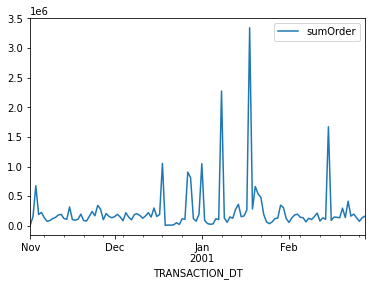

In [67]:
by_date.plot()

Виконуємо resample даних.

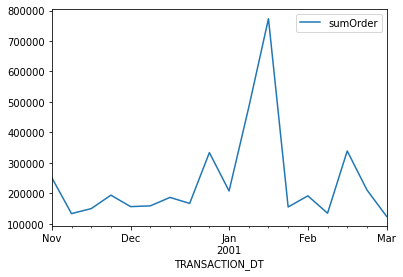

In [68]:
weekly_resampled_data = by_date.resample('W').mean()
weekly_resampled_data.plot()

Будуємо графік автокореляції.

In [31]:
from pandas import plotting

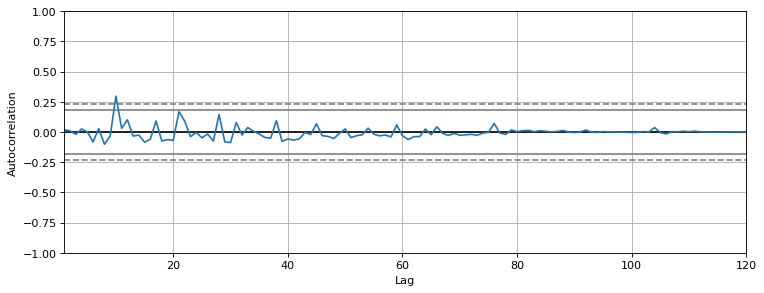

In [69]:
plt.figure(figsize = (11,4),dpi=80)
pd.plotting.autocorrelation_plot(by_date)

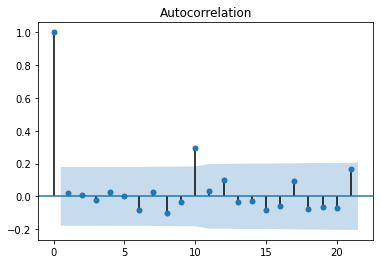

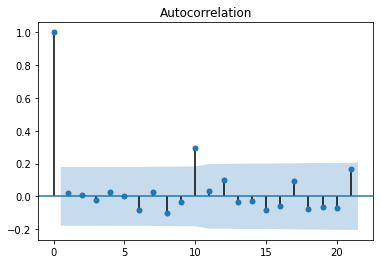

In [70]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(by_date)

Проводимо розподіл датасету на навчальну та тестову множину.

In [45]:
def TimeSeriesTrainSplit(x, y, test_size):
  
  test_index = int(len(x)*(1-test_size))

  X_train = x.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = x.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, y_train, X_test, y_test

In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.ar_model import AR

In [71]:
Xar = by_date.sumOrder
Xar = Xar.reset_index(drop=True)
Xar

0       10225
1      156490
2      675830
3      189316
4      225553
        ...  
115    197230
116    135480
117     75152
118    137271
119    161491
Name: sumOrder, Length: 120, dtype: int64

In [74]:
Yar = by_date.sumOrder
Yar = Yar.reset_index(drop=True)
Yar.head()

0     10225
1    156490
2    675830
3    189316
4    225553
Name: sumOrder, dtype: int64

In [76]:
X_train, y_train, X_test, y_test = TimeSeriesTrainSplit(Xar, Yar, 0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(96,) (96,) (24,) (24,)


Виконуємо прогнозування методом AR.

In [77]:
model_ar = AR(X_train)
model_ar_fit = model_ar.fit()

In [90]:
predictionsAR = model_ar_fit.predict(X_train.size, X_train.size+X_test.size-1)

In [80]:
y_testAR = y_test.reset_index(drop=True)
predictionsAR = predictionsAR.reset_index(drop=True)

Виводимо графік порівняння фактичних та прогнозованих даних.

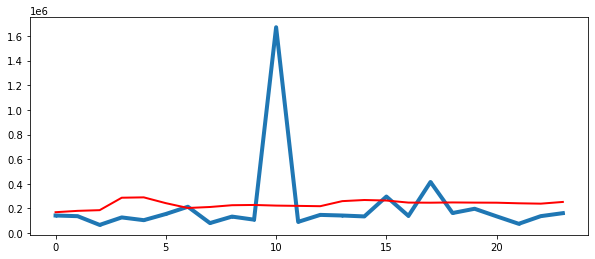

In [81]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_testAR.loc[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(predictionsAR.loc[:100], markersize=3, linewidth=2, color='red', label='Prediction')

Розраховуємо значення метрик RMSE, MAE та R2.

In [105]:
mseAR = mean_squared_error(y_testAR,predictionsAR)
mseAR

99366648745.07678

In [83]:
rmseAR = np.sqrt(mseAR)
rmseAR

315224.7590927413

In [84]:
maeAR=mean_absolute_error(y_testAR,predictionsAR)
maeAR

157849.763573933

In [85]:
r2AR = r2_score(y_testAR,predictionsAR)
r2AR

-0.021173700234092152

Проводимо етап feature selection.

In [99]:
df_lags = by_date.copy()
df_lags['Year'] = df_lags.index.year
df_lags['Month'] = df_lags.index.month
df_lags['Weekday'] = df_lags.index.weekday
df_lags['Quarter'] = df_lags.index.quarter
df_lags.head()

,sumOrder,Year,Month,Weekday,Quarter
TRANSACTION_DT,,,,,
2000-11-01,10225,2000,11,2,4
2000-11-02,156490,2000,11,3,4
2000-11-03,675830,2000,11,4,4
2000-11-04,189316,2000,11,5,4
2000-11-05,225553,2000,11,6,4


Утворюємо 5 лагів.

In [100]:
for i in range(1, 6):
  df_lags['lag_{}'.format(i)] = df_lags.sumOrder.shift(i)

In [101]:
df_lags.head()

,sumOrder,Year,Month,Weekday,Quarter,lag_1,lag_2,lag_3,lag_4,lag_5
TRANSACTION_DT,,,,,,,,,,
2000-11-01,10225,2000,11,2,4,NaN,NaN,NaN,NaN,NaN
2000-11-02,156490,2000,11,3,4,10225.0,NaN,NaN,NaN,NaN
2000-11-03,675830,2000,11,4,4,156490.0,10225.0,NaN,NaN,NaN
2000-11-04,189316,2000,11,5,4,675830.0,156490.0,10225.0,NaN,NaN
2000-11-05,225553,2000,11,6,4,189316.0,675830.0,156490.0,10225.0,NaN


In [102]:
df_lags = df_lags.iloc[5:]
df_lags.head()

,sumOrder,Year,Month,Weekday,Quarter,lag_1,lag_2,lag_3,lag_4,lag_5
TRANSACTION_DT,,,,,,,,,,
2000-11-06,135666,2000,11,0,4,225553.0,189316.0,675830.0,156490.0,10225.0
2000-11-07,75123,2000,11,1,4,135666.0,225553.0,189316.0,675830.0,156490.0
2000-11-08,87523,2000,11,2,4,75123.0,135666.0,225553.0,189316.0,675830.0
2000-11-09,122190,2000,11,3,4,87523.0,75123.0,135666.0,225553.0,189316.0
2000-11-10,140993,2000,11,4,4,122190.0,87523.0,75123.0,135666.0,225553.0


In [106]:
X = df_lags.drop("sumOrder",axis=1)
X.head()

,Year,Month,Weekday,Quarter,lag_1,lag_2,lag_3,lag_4,lag_5
TRANSACTION_DT,,,,,,,,,
2000-11-06,2000,11,0,4,225553.0,189316.0,675830.0,156490.0,10225.0
2000-11-07,2000,11,1,4,135666.0,225553.0,189316.0,675830.0,156490.0
2000-11-08,2000,11,2,4,75123.0,135666.0,225553.0,189316.0,675830.0
2000-11-09,2000,11,3,4,87523.0,75123.0,135666.0,225553.0,189316.0
2000-11-10,2000,11,4,4,122190.0,87523.0,75123.0,135666.0,225553.0


Проводимо розподіл даних на навчальну та тестову множину.

In [107]:
Y = df_lags.sumOrder
Y.head()

TRANSACTION_DT
2000-11-06    135666
2000-11-07     75123
2000-11-08     87523
2000-11-09    122190
2000-11-10    140993
Name: sumOrder, dtype: int64

In [108]:
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [109]:
X_train, y_train, X_test, y_test = TimeSeriesTrainSplit(X, Y, 0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(92, 9) (92,) (23, 9) (23,)


Проводимо прогнозування методом LinearRegression.

In [110]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = regressor.predict(X_test)

Будуємо графік порівняння фактичних та прогнозованих даних.

In [116]:
y_test = y_test.reset_index(drop=True)
y_pred1=pd.Series(y_pred)

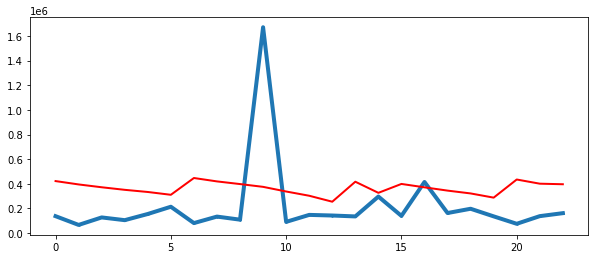

In [117]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(y_test[:100], marker='.', linewidth=4, markersize=3, label='Real_value')
ax.plot(y_pred1[:100], markersize=3, linewidth=2, color='red', label='Prediction')

Розраховуємо значення метрик RMSE, MAE та R2.

In [112]:
mse = mean_squared_error(y_test,y_pred)
mse

126216957179.9942

In [113]:
rmse = np.sqrt(mse)
rmse

355270.2593519393

In [114]:
r2 = r2_score(y_test,y_pred)
r2

-0.24604296797846015

In [115]:
mae=mean_absolute_error(y_test,y_pred)
mae

263626.10478549334